In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
file_path = r'/content/Nifty 50 Historical Data.xls'
df = pd.read_csv(file_path)

In [4]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/01/2024,"23,602.35","24,331.45","24,536.35","23,509.85",2.42B,-2.49%
1,10/01/2024,"24,205.35","25,788.45","25,907.60","24,073.90",6.33B,-6.22%
2,09/01/2024,"25,810.85","25,333.60","26,277.35","24,753.15",6.16B,2.28%
3,08/01/2024,"25,235.90","25,030.95","25,268.35","23,893.70",6.33B,1.14%
4,07/01/2024,"24,951.15","23,992.95","24,999.75","23,992.70",7.09B,3.92%


In [5]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

In [6]:
columns_to_clean = ['Price', 'Open', 'High', 'Low']
for col in columns_to_clean:
    data[col] = data[col].str.replace(',', '').astype(float)

# Convert 'Vol.' column
data['Vol.'] = data['Vol.'].str.replace('B', '').astype(float) * 1e9  # 'B' = Billion

# Convert 'Change %' column
data['Change %'] = data['Change %'].str.replace('%', '').astype(float)

In [7]:
data = data.sort_values(by='Date')

In [8]:
X = data[['Open', 'High', 'Low', 'Vol.', 'Change %']]
y = data['Price']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
y_pred = model.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 35544.04385779718
R² Score: 0.9924885623917066


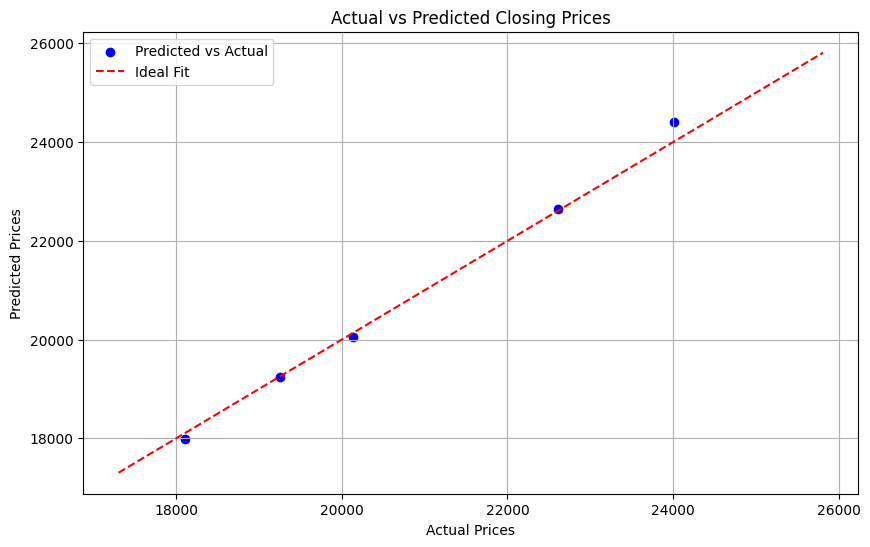

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Fit')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

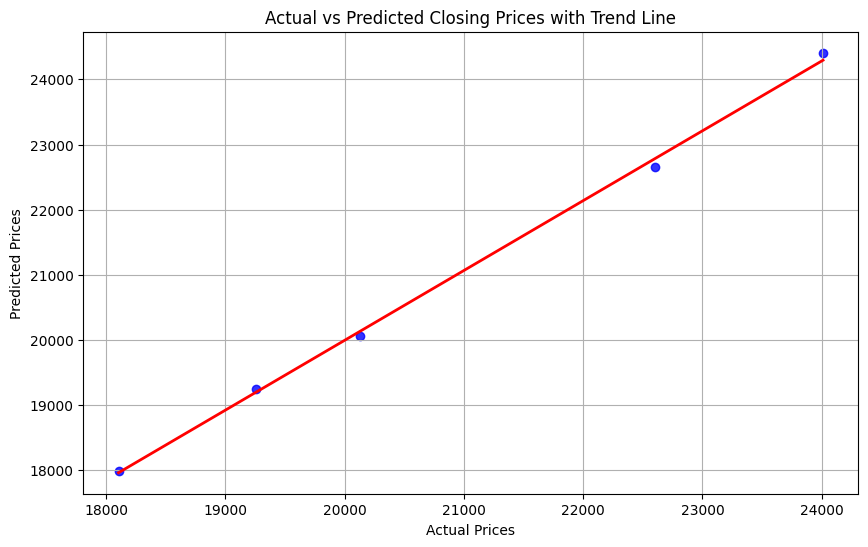

In [15]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, ci=None, color='blue', line_kws={'color': 'red', 'lw': 2})
plt.title('Actual vs Predicted Closing Prices with Trend Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()


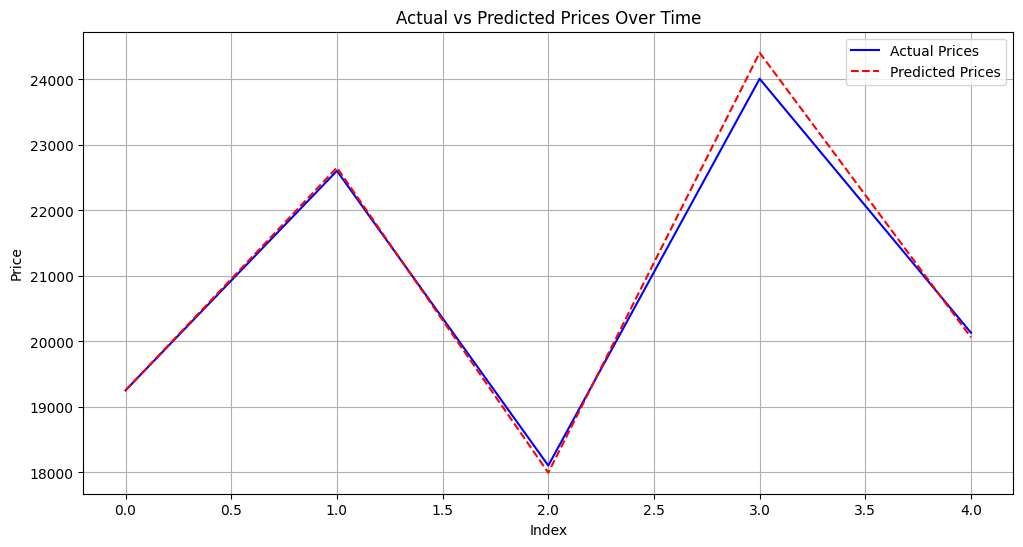

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue', linestyle='-')
plt.plot(y_pred, label='Predicted Prices', color='red', linestyle='--')
plt.title('Actual vs Predicted Prices Over Time')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

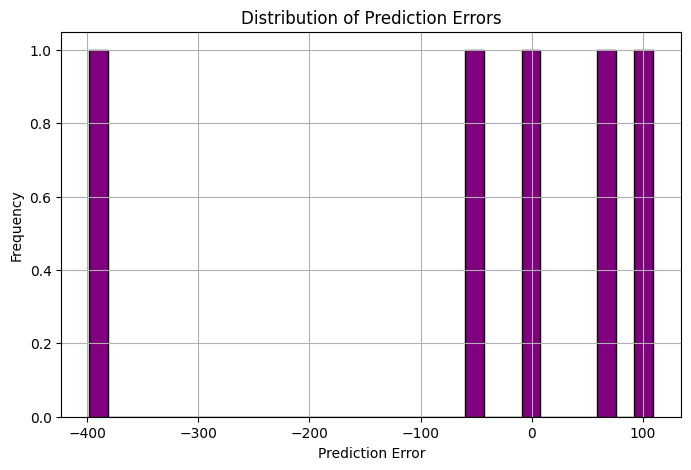

In [17]:
errors = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.hist(errors, bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Prediction**

<ipython-input-18-1678666095>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=new_data.index, y=new_data['Predicted Price'], palette='Set2')


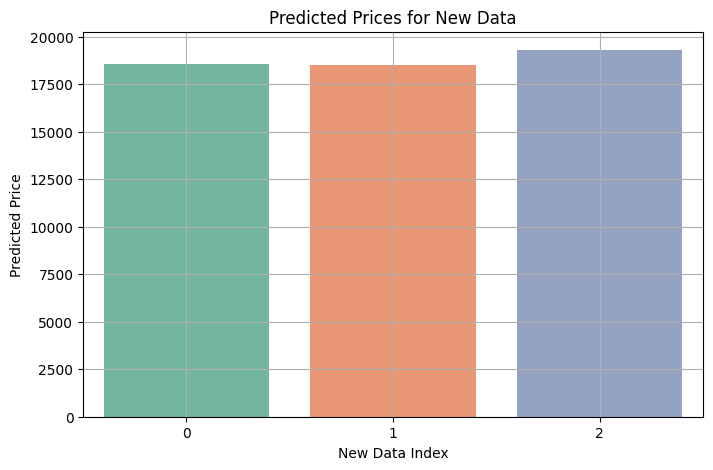

In [18]:
new_data = pd.DataFrame({
    'Open': [18500.0, 18700.0, 19000.0],
    'High': [18800.0, 19000.0, 20000.0],
    'Low': [18200.0, 18350.0, 19100.0],
    'Vol.': [5.5e9, 6.0e9, 7.0e9],
    'Change %': [0.5, -0.8, 1.2]
})
new_data['Predicted Price'] = model.predict(new_data)

plt.figure(figsize=(8, 5))
sns.barplot(x=new_data.index, y=new_data['Predicted Price'], palette='Set2')
plt.title('Predicted Prices for New Data')
plt.xlabel('New Data Index')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

In [19]:
print(new_data)

      Open     High      Low          Vol.  Change %  Predicted Price
0  18500.0  18800.0  18200.0  5.500000e+09       0.5     18551.465204
1  18700.0  19000.0  18350.0  6.000000e+09      -0.8     18511.927047
2  19000.0  20000.0  19100.0  7.000000e+09       1.2     19296.876892
